# Clustering Evaluation for seeds data.

### About Dataset

Measurements of geometrical properties of kernels belonging to three different varieties of wheat.
A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of 
Agrophysics of the Polish Academy of Sciences in Lublin.

You can find the dataset at [Kaggle](https://www.kaggle.com/datasets/rwzhang/seeds-dataset) and [ICS Archive.](https://archive.ics.uci.edu/ml/datasets/seeds)

### Content

Additional Variable Information

To construct the data, seven geometric parameters of wheat kernels were measured: 
 - area A, 
 - perimeter P, 
 - compactness C = 4*pi*A/P^2, 
 - length of kernel,
 - width of kernel,
 - asymmetry coefficient
 - length of kernel groove.
All of these parameters were real-valued continuous.

### Objective

To segment the seeds into three cluster based on the 7 features : Area, Perimeter, Compactness, Length , Width of kernel, Asymmetry coefficient, Length of kernel groove.

For this dataset, we do know there are three types of classification, but while handling unlabeled data we have to use other metrics to find the optimal number of clusters or classifications for the data.

We can use inertia, silhouette samples, davies bouldin score to find the optimal number of cluster when we are handling new, unseen data.

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from hdbscan import HDBSCAN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score, make_scorer

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Loading the dataset

In [3]:
df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None)
col_names = ['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'class']
df.columns = col_names
df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length_of_kernel         210 non-null    float64
 4   width_of_kernel          210 non-null    float64
 5   asymmetry_coefficient    210 non-null    float64
 6   length_of_kernel_groove  210 non-null    float64
 7   class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
df.describe()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


**Correlation:**

In [6]:
df.corr()['class'].drop('class').sort_values(ascending=False)

asymmetry_coefficient      0.577273
length_of_kernel_groove    0.024301
length_of_kernel          -0.257269
perimeter                 -0.327900
area                      -0.346058
width_of_kernel           -0.423463
compactness               -0.531007
Name: class, dtype: float64

### Data Preprocessing

Let us scale our data using StandardScaler.

In [7]:
X = df.drop('class', axis=1)
Y = df['class']

X.shape, Y.shape

((210, 7), (210,))

In [8]:
sc = StandardScaler()
pca = PCA(n_components=2)
X_scaled = sc.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

After Principal Component Analysis, we have a 2d data, so this how our clustering result should look like, if we achieved great accuracy.

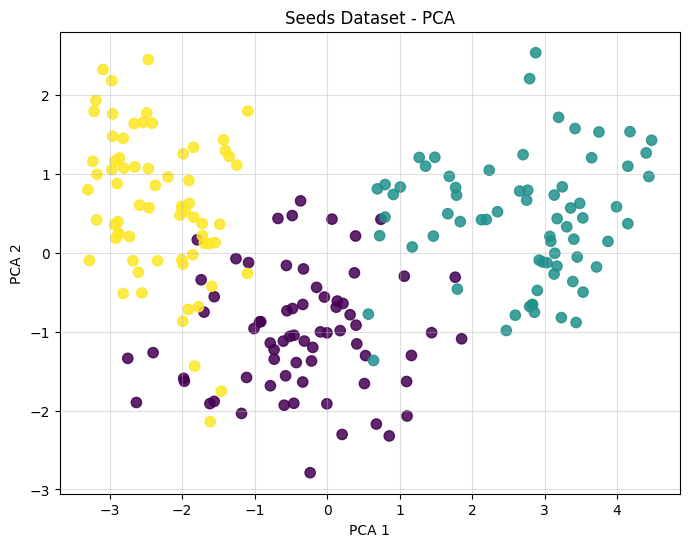

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1], c=Y, s=55, alpha=0.85)
plt.grid(True, alpha=0.40)
plt.title("Seeds Dataset - PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

#### Functions

In [10]:
m_model = []
m_sscore = []
m_dbscore = []
m_ch = []
m_mi = []
m_ri = []

def scores(X, labels, name):
    '''
    this function calculates and prints the different metric of the model.
    '''
    y = Y
    s_score = silhouette_score(X, labels, metric='euclidean')
    db_score = davies_bouldin_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    mi_score = mutual_info_score(y,labels)
    ri_score = adjusted_rand_score(y, labels)
    
    print("Model: ", name)
    print("Silhouette Score: ", s_score)
    print("Davies Bouldin Score: ", db_score)
    print("Calinski Harabasz Score", ch_score)
    print("Mutual Info score", mi_score)
    print("Adjusted Rand Index", ri_score)

    m_model.append(name)
    m_sscore.append(s_score)
    m_dbscore.append(db_score)
    m_ch.append(ch_score)
    m_mi.append(mi_score)
    m_ri.append(ri_score)

In [11]:
def grid_eval(grid):
    print("Best Parameters: ", grid.best_params_)
    print("Best Score: ", grid.best_score_)

In [12]:
def plot_sct(X, labels, name):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0],X[:,1], c=labels, s=55, alpha=0.85)
    plt.grid(True, alpha=0.15)
    plt.title(f"Seeds Dataset - {name}")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

## KMeans

In [22]:
kmeans = KMeans(n_clusters=3,init='k-means++', n_init=20, random_state=42)
kmeans.fit_predict(X_pca)
km_labels = kmeans.labels_
scores(X_pca, km_labels, 'KMeans')

Model:  KMeans
Silhouette Score:  0.49343048696031894
Davies Bouldin Score:  0.7066734757979809
Calinski Harabasz Score 397.3010783863672
Mutual Info score 0.8110460356742204
Adjusted Rand Index 0.7850359051341558


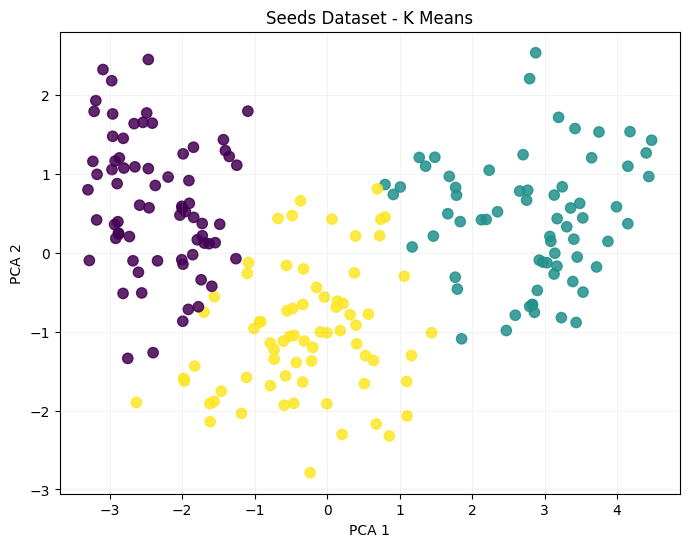

In [14]:
plot_sct(X_pca, km_labels, 'K Means')

## DBSCAN

In [15]:
dbscan = DBSCAN(eps=0.5, metric='euclidean', min_samples=5, algorithm='auto')
dbscan.fit_predict(X_pca)
db_labels = dbscan.labels_
scores(X_pca, db_labels, 'DBSCAN')

Model:  DBSCAN
Silhouette Score:  0.33246034672880503
Davies Bouldin Score:  1.5281799832556464
Calinski Harabasz Score 147.48498342728425
Mutual Info score 0.7682208783098807
Adjusted Rand Index 0.6365678994482437


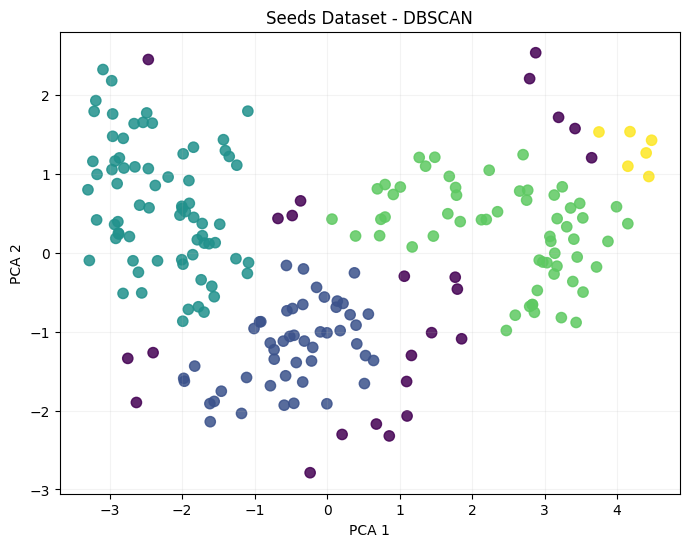

In [16]:
plot_sct(X_pca, db_labels, 'DBSCAN')

## HDBSCAN

In [17]:
hdb = HDBSCAN(min_cluster_size=3, min_samples=10)
hdb.fit_predict(X_pca)
hdb_labels = hdb.labels_
scores(X_pca, hdb_labels,'HDBSCAN')

Model:  HDBSCAN
Silhouette Score:  0.06226857052373988
Davies Bouldin Score:  1.5951576969514432
Calinski Harabasz Score 48.01769931468204
Mutual Info score 0.522987813482646
Adjusted Rand Index 0.2782540501537627


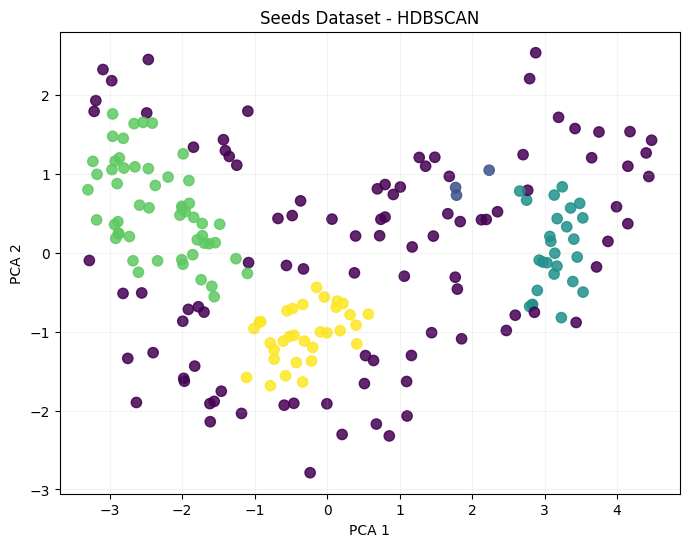

In [18]:
plot_sct(X_pca, hdb_labels,'HDBSCAN')

## Agglomerative Clustering

In [19]:
agc = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
agc.fit_predict(X_pca)
agc_labels = agc.labels_
scores(X_pca, agc_labels, 'Agglomerative Clutsering')

Model:  Agglomerative Clutsering
Silhouette Score:  0.4976222281898096
Davies Bouldin Score:  0.6871430153449981
Calinski Harabasz Score 393.5672603667222
Mutual Info score 0.8239672674914968
Adjusted Rand Index 0.7860844701256925


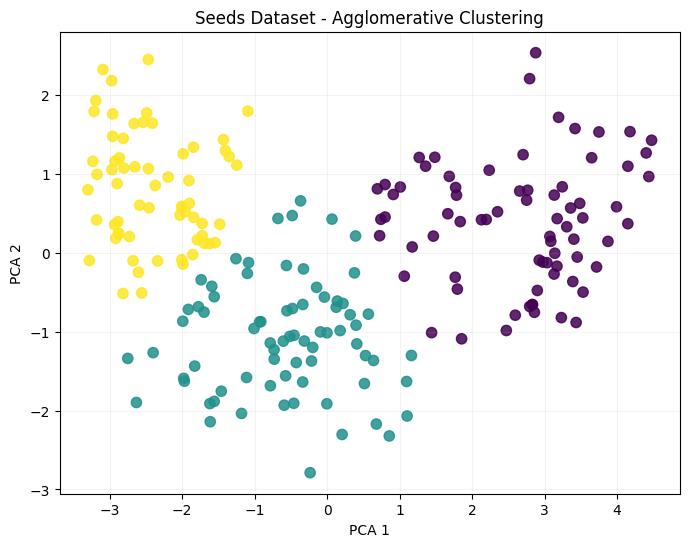

In [20]:
plot_sct(X_pca, agc_labels, 'Agglomerative Clustering')

### Model Evaluation

| **Metric**                   | **Description**                                                                                                                                                    | **Larger is Better?** | **Preferred Value Range**                                                |
| ---------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------- | ------------------------------------------------------------------------ |
| **Silhouette Score**         | Measures how similar each point is to its own cluster vs. other clusters. Ranges from -1 to 1. A higher score means better clustering.                             | **Larger**            | Range: \[-1, 1]. **Higher values** indicate better clustering.           |
| **Davies-Bouldin Score**     | Measures the ratio of within-cluster scatter to between-cluster separation. Lower values indicate better clustering (more distinct and compact clusters).          | **Smaller**           | Lower is better. A value close to 0 is ideal.                            |
| **Calinski-Harabasz Score**  | Measures the ratio of between-cluster dispersion to within-cluster dispersion. A higher score indicates better-defined clusters.                                   | **Larger**            | No strict upper bound. **Higher values** are better.                     |
| **Mutual Information Score** | Measures the amount of information shared between clusters and the ground truth (or labels). Higher values indicate better clustering with respect to true labels. | **Larger**            | Higher values are better.                                                |
| **Adjusted Rand Index**      | Measures similarity between the predicted clustering and the true labels, adjusted for chance. Values range from -1 to 1, with 1 being perfect agreement.          | **Larger**            | Range: \[-1, 1]. **Higher values** indicate better clustering alignment. |


**Let us compare our models:**

In [21]:
df_met = pd.DataFrame([m_model, m_sscore, m_dbscore, m_ch, m_mi, m_ri])
df_met = df_met.T
df_met.columns = ['Model', 'Silhouette Score', 'Davies Bouldin Score', 'Calinski Harabasz Score', 'Mutual Information Score', 'Adjusted Rand Index']
df_met

,Model,Silhouette Score,Davies Bouldin Score,Calinski Harabasz Score,Mutual Information Score,Adjusted Rand Index
0,KMeans,0.49343,0.706673,397.301078,0.811046,0.785036
1,DBSCAN,0.33246,1.52818,147.484983,0.768221,0.636568
2,HDBSCAN,0.062269,1.595158,48.017699,0.522988,0.278254
3,Agglomerative Clutsering,0.497622,0.687143,393.56726,0.823967,0.786084


Agglomerative Clustering and K-Means has done a good job clustering the data, better than HDBSCAN and DBSCAN.

## Conclusion

In this clustering project, multiple unsupervised learning algorithms were applied to a dataset of wheat seed geometrical measurements to identify natural groupings of the three wheat varieties: Kama, Rosa, and Canadian.

**Best Models:** KMeans and Agglomerative Clustering performed similarly and significantly better than DBSCAN and HDBSCAN across all major clustering evaluation metrics.

Agglomerative Clustering slightly outperformed KMeans in all metrics, making it the best overall method for this specific dataset.
